# Training linear regression models

In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sklearn
from IPython.display import HTML

# some defaults for making plots look nice
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

%matplotlib inline

In [85]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_surface_plot(X,Y,Z,xlabel,ylabel):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z,cmap=cm.jet)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);


def make_contour_plot(X,Y,Z,levels,xlabel,ylabel,theta):
    fig,ax = plt.subplots()
    CS = plt.contour(X, Y, Z, levels = levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(theta[0],theta[1], 'ro')
    

# Linear Regression: generate and visualize data

- generate (x,y) data from a linear model y = 4 + 3x with noise from a zero-mean, unit variance Gaussian
- visualize the (x,y) data and plot the ground truth line (y = 4+3x)


(100, 1) (100, 1)


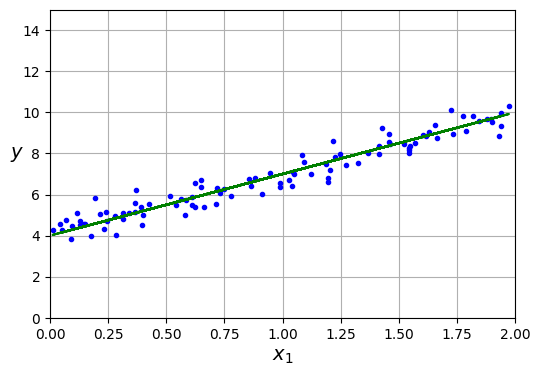

In [3]:
# generate (x,y) data

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m,1)  # sample uniformly from [0,2] getting m samples
y = 4 + 3 * X + 0.5 * np.random.randn(m,1)  # compute y from model with noise from 0.3 * zero-mean, unit var Gaussian
print(X.shape,y.shape)

# visualize the data

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")

# plot the ground truth line
plt.plot(np.sort(X),4 + 3*np.sort(X),'g')

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()


# Linear regression: a loss function perspective

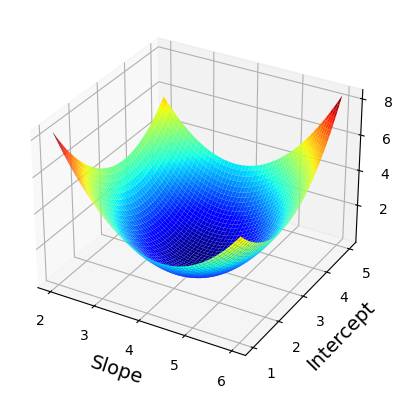

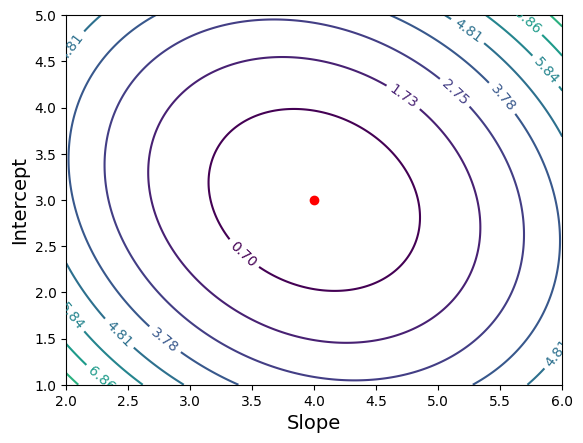

In [86]:
# calculate the MSE loss function over a grid of intercept and slope values



# vectorized the following computation 
intercept_vals = np.linspace(2.0,6.0, 500)
slope_vals = np.linspace(1.0,5.0, 500)
intercepts, slopes = np.meshgrid(intercept_vals, slope_vals)
T = np.c_[intercepts.ravel(), slopes.ravel()]

# true function y = 4 + 3x
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 4 * Xr[:, :1] + 3 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(intercepts.shape)



make_surface_plot(intercepts,slopes,J,'Slope','Intercept')
make_contour_plot(intercepts,slopes,J,np.linspace(0.7,12,12),'Slope','Intercept',[4,3])
plt.show()

# Linear Regression: the normal equation

- use the normal equation to recover the intercept and slope parameters of the model from the data
- plot the predictions using the learned model

In [6]:
# prepare data for normal equation: add a column of 1s to X to recover intercept parameter

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

# calculate optimal theta using (Xb.T Xb)^{-1} Xb.T y
# @ stands for matrix multiply

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print('Estimated theta = ',theta_best)
print('True theta = [[4],[3]]')

Estimated theta =  [[4.10754808]
 [2.88505669]]
True theta = [[4],[3]]


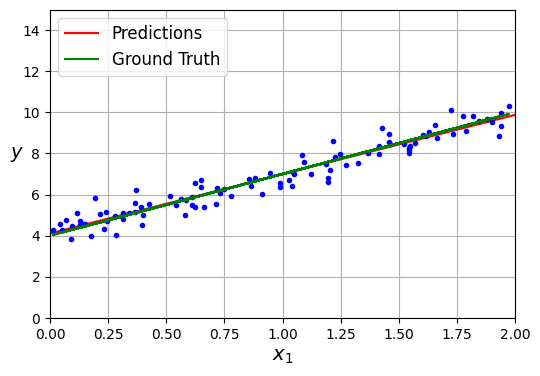

In [7]:
Xnew = np.array([[0],[2]])
Xnew_b = add_dummy_feature(Xnew)
ypred = Xnew_b @ theta_best


# plot predictions on new data (x=0 and x=2) -- endpoints of our domain

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(Xnew, ypred, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.plot(np.sort(X), 4 + 3 * np.sort(X),'g',label='Ground Truth')
# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

# Linear regression: build model using sklearn

- use the sklearn built in function to derive the parameters of the generating model
- predict using the learned model and visualize predictions

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print("Intercept = ", model.intercept_, "Coefficients = ", model.coef_)

Intercept =  [4.10754808] Coefficients =  [[2.88505669]]


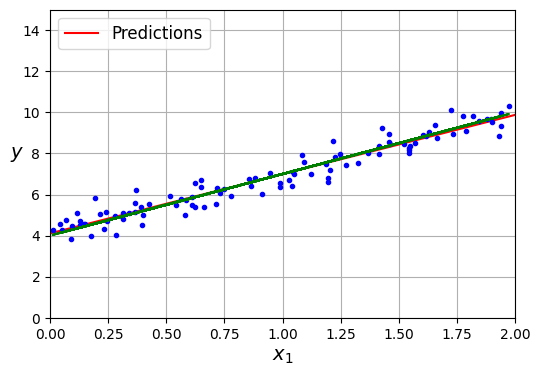

In [88]:
# plot predictions on new data (x=0 and x=2) -- endpoints of our domain

Xnew = np.array([[0],[2]])
ypred = model.predict(Xnew)

# plotting 

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(Xnew, ypred, "r-", label="Predictions")

# show training data
plt.plot(X, y, "b.")

# plot the ground truth line
plt.plot(np.sort(X),4 + 3*np.sort(X),'g')

# add annotations
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

# Linear Regression: from scratch by batch gradient descent

- Full batch gradient descent:
   - augment data matrix X with a column of 1s
   - set learning rate eta, n_epochs
   - initialize parameter vector theta (intercept and coefficients) to small random numbers
   - for epoch in range(n_epochs)
      - compute gradient of theta wrt squared error loss function
      - update theta: theta <- theta - eta * gradient

theta =  [[4.07991454]
 [2.90945561]]


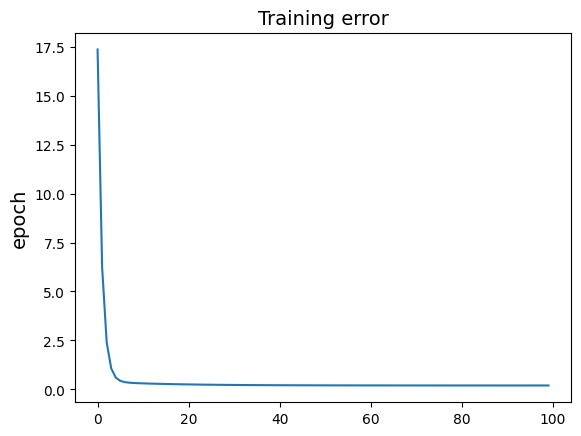

In [89]:
from sklearn.preprocessing import add_dummy_feature

eta = 0.1 # learning rate
n_epochs = 100
m = len(X_b) # number of examples

np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1],1)

losses = []
theta_path = [theta]
for epoch in range(n_epochs):
    gradient = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient
    loss = 1/m * (X_b @ theta - y).T @ (X_b @ theta - y)
    losses.append(np.squeeze(loss))
    theta_path.append(theta)
 
theta_path = np.array(theta_path)
    
print('theta = ', theta)

plt.figure()
plt.plot(np.arange(n_epochs),losses)
plt.title('Training error')
plt.ylabel('loss')
plt.ylabel('epoch');

# Visualizing batch gradient descent updates

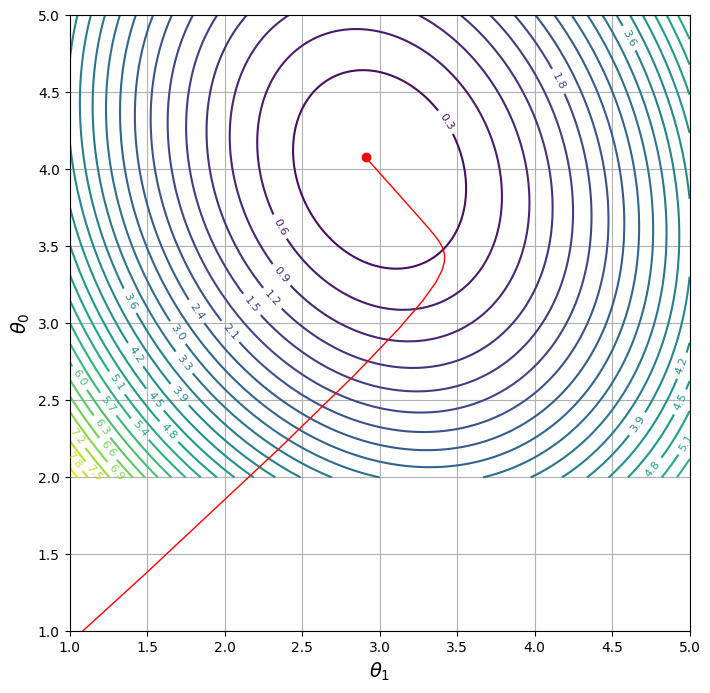

In [87]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((1,5))
ax.set_ylim((1,5))
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.grid(True)

# Background contour plot
tt1,tt2 = np.meshgrid(slope_vals,intercept_vals)
contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')

ax.clabel(contours, inline=True, fontsize=8)

# create objects that will change during animation
pt, = ax.plot([],[],'ro')
path_line, = ax.plot([],[],'r-',lw=1)

# now drawframe

def init():
    pt.set_data([],[])
    path_line.set_data([],[])
    return [pt,path_line]

def drawframe(n):
    pt.set_data(theta_path[n,1],theta_path[n,0])
    path_line.set_data(theta_path[:n+1,1],theta_path[:n+1,0])
    
    return [pt,path_line]

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path), init_func = init,
                              interval=50, blit=True,repeat=True)

anim.save("./gd.mp4", writer='ffmpeg', fps = 30)

from IPython.display import HTML

HTML("""
<video width="480" controls>
  <source src="gd.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")


# Linear Regression: from scratch by stochastic gradient descent

- Stochastic gradient descent:
   - select n_epochs, and t0, t1 (learning schedule hyperparameters)
   - augment data matrix X with a column of 1s (m = number of examples in X)
   - initialize parameter vector theta (intercept and coefficients) to small random numbers
   - for epoch in range(n_epochs)
        - for iter in range(m)
             - select a random element i in [0,m-1] and get X[i] and y[i]
             
             - compute gradient of theta wrt squared error loss function on X[i],y[i]
             
             - update eta: learning_schedule(epoch*m + iter)
             
             - update theta: theta <- theta - eta * gradient

In [70]:
def learning_schedule(t):
    return t0 / (t + t1)

n_epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance


np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization


theta_path_sgd = [theta]

for epoch in range(n_epochs):
    for iter in range(X_b.shape[0]):
        ridx = np.random.randint(X_b.shape[0])
        xi = X_b[ridx : ridx + 1,:]
        yi = y[ridx : ridx + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iter)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  
        
theta_path_sgd = np.array(theta_path_sgd)
        
print("Theta using SGD = ", theta)

Theta using SGD =  [[4.09595391]
 [2.8980184 ]]


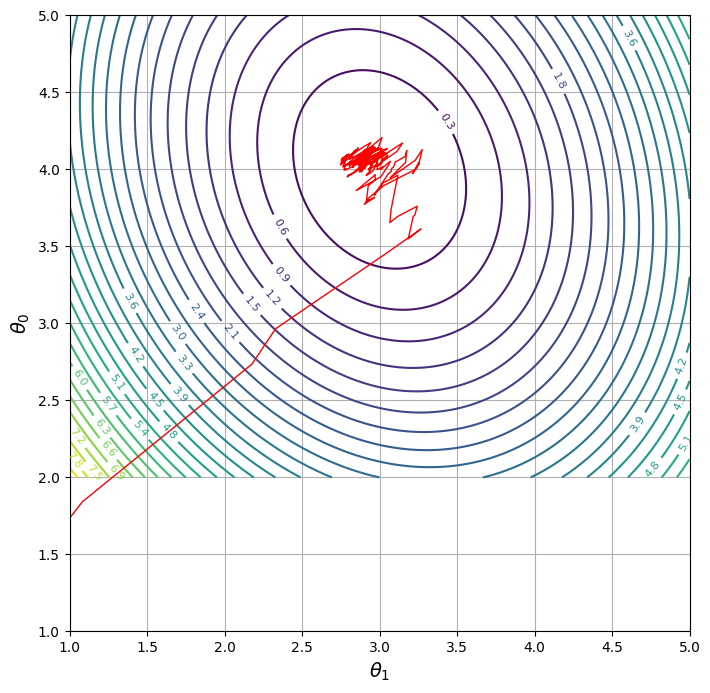

In [90]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((1,5))
ax.set_ylim((1,5))
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.grid(True)

# Background contour plot
tt1,tt2 = np.meshgrid(slope_vals,intercept_vals)
contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')

ax.clabel(contours, inline=True, fontsize=8)

# create objects that will change during animation
pt, = ax.plot([],[],'ro')
path_line, = ax.plot([],[],'r-',lw=1)

# now drawframe

def init():
    pt.set_data([],[])
    path_line.set_data([],[])
    return [pt,path_line]

def drawframe(n):
    pt.set_data(theta_path_sgd[n,1],theta_path_sgd[n,0])
    path_line.set_data(theta_path_sgd[:n+1,1],theta_path_sgd[:n+1,0])
    
    return [pt,path_line]

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path_sgd), init_func = init,
                              interval=50, blit=True,repeat=True)

#plt.show()

anim.save("./sgd.mp4", writer='ffmpeg', fps = 30)

from IPython.display import HTML

HTML("""
<video width="480" controls>
  <source src="sgd.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")



# Linear Regression: from scratch by mini-batch gradient descent

- Stochastic gradient descent:
   - select n_epochs, minibatch_size, and compute num_batches_per_epoch (ceil(m/minibatch_size)
   - select t0, t1 for learning schedule
   - augment data matrix X with a column of 1s (m = number of examples in X)
   - initialize parameter vector theta (intercept and coefficients) to small random numbers
   - for epoch in range(n_epochs)
        - shuffle X and y 
        - for iter in range(num_batches_epoch)
             - select idx = iter * minibatch_size
             - get minibatch: X[idx:idx+minibatch_size] and y[idx:idx+minibatch_size]
             - compute gradient of theta wrt squared error loss function on minibatch
             
             - update eta: learning_schedule(epoch*m + iter)
             
             - update theta: theta <- theta - eta * gradient

In [73]:
def learning_schedule(t):
    return t0 / (t + t1)

n_epochs = 10
minibatch_size = 20
num_batches_per_epoch = np.ceil(m/X_b.shape[0])

t0, t1 = 200, 1000  # learning schedule hyperparameters

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

np.random.seed(42)
theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization

theta_path_mgd = [theta]

for epoch in range(n_epochs):
    shuffle_idx = np.random.permutation(X_b.shape[0])
    X_b_shuffled = X_b[shuffle_idx]
    y_shuffled = y[shuffle_idx]
    for i in range(X_b.shape[0]):
        idx = i * minibatch_size
        xi = X_b_shuffled[ridx : ridx + minibatch_size]
        yi = y_shuffled[ridx : ridx + minibatch_size]
        gradients = 2/minibatch_size  * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * num_batches_per_epoch + i)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)  

theta_path_mgd = np.array(theta_path_mgd)
        
print("Theta using SGD = ", theta)

Theta using SGD =  [[4.1892497 ]
 [2.97075629]]


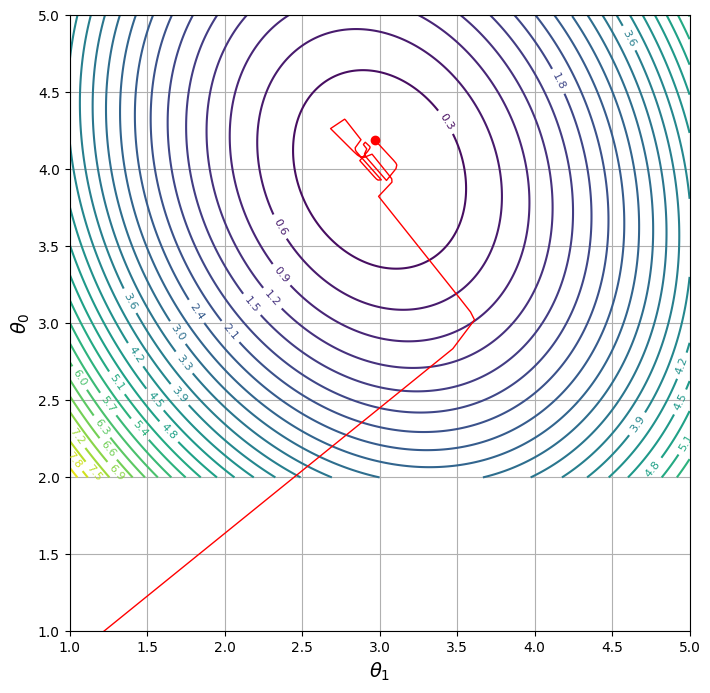

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((1,5))
ax.set_ylim((1,5))
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.grid(True)

# Background contour plot
tt1,tt2 = np.meshgrid(slope_vals,intercept_vals)
contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')

ax.clabel(contours, inline=True, fontsize=8)

# create objects that will change during animation
pt, = ax.plot([],[],'ro')
path_line, = ax.plot([],[],'r-',lw=1)

# now drawframe

def init():
    pt.set_data([],[])
    path_line.set_data([],[])
    return [pt,path_line]

def drawframe(n):
    pt.set_data(theta_path_mgd[n,1],theta_path_mgd[n,0])
    path_line.set_data(theta_path_mgd[:n+1,1],theta_path_mgd[:n+1,0])
    
    return [pt,path_line]

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path_mgd), init_func = init,
                              interval=50, blit=True,repeat=True)



anim.save("./minibatch_gd.mp4", writer='ffmpeg', fps = 30)

from IPython.display import HTML

HTML("""
<video width="480" controls>
  <source src="minibatch_gd.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")

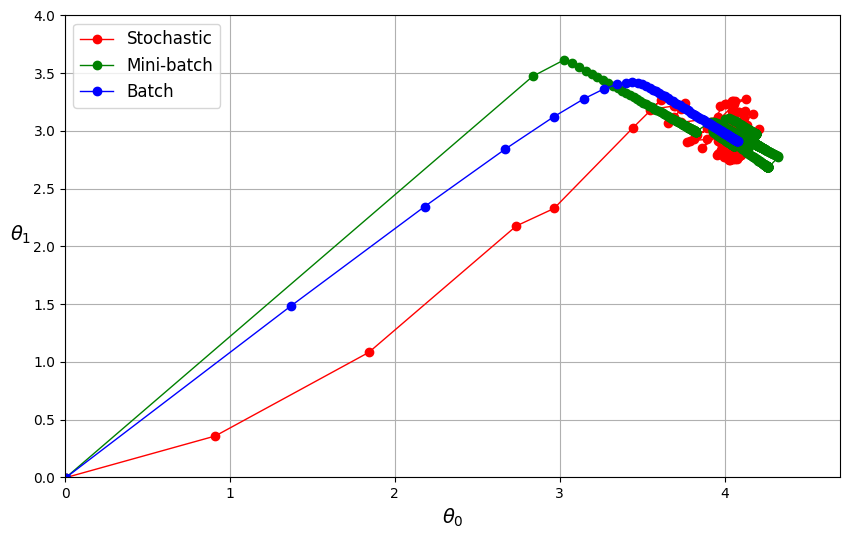

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-o", linewidth=1,
         label="Stochastic")
         
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-o", linewidth=1,
         label="Mini-batch")
plt.plot(theta_path[:, 0], theta_path[:, 1], "b-o", linewidth=1,
        label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([0.0, 4.7, 0.0, 4.0])
plt.grid()
plt.legend(loc="upper left");
plt.show()